Enter the zip code: 98106
Enter the number of beds: 5
Enter the number of baths: 4
Enter the square footage: 6000
For a property of 6000.0 sqft in zip code 98106 with Beds 5 and baths 4, the predicted price is ₹3,240,900.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


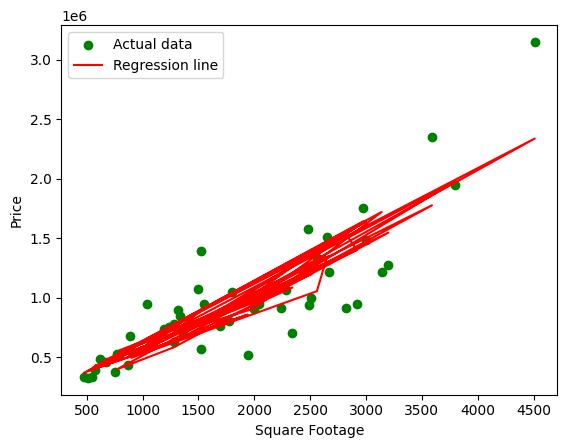

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load and filter dataset
df = pd.read_csv("final_dataset.csv")
data = df[1:50]

# Feature matrix and target
X = data[['zip_code', 'size','beds','baths']]
y = data['price']

# Train model
model = LinearRegression()
model.fit(X, y)

# Get user input for prediction
try:
    zip_code = int(input("Enter the zip code: "))
    beds=int(input("Enter the number of beds: "))
    baths=int(input("Enter the number of baths: "))
    size = float(input("Enter the square footage: "))

    prediction = model.predict([[zip_code, size,beds,baths]])
    price = abs(prediction[0])  # Ensure the price is non-negative

    print(f"For a property of {size} sqft in zip code {zip_code} with Beds {beds} and baths {baths}, the predicted price is ₹{price:,.0f}.")
except ValueError:
    print("Invalid input. Please enter numeric values for zip code and square footage.")

# Plotting (optional)
plt.scatter(data['size'], y, color='green', label='Actual data')
plt.plot(data['size'], model.predict(X), color='red', label='Regression line')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.legend()
plt.show()